# Stock Market Prediction And Forecasting Using Stacked LSTM

# Data Collection

In [165]:

import pandas_datareader as pdd

In [166]:
df = pdd.data.get_data_yahoo('WIT',start='2016-03-17', end ='2021-12-21')

In [167]:
import pandas as pd

In [168]:
df.shape


(1454, 6)

In [169]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-16,6.010,5.915,5.955,6.010,615200.0,5.906134
2016-03-17,6.110,5.975,6.005,6.080,871600.0,5.974924
2016-03-18,6.165,6.095,6.150,6.165,1348400.0,6.058455
2016-03-21,6.210,6.170,6.170,6.180,603400.0,6.073195
2016-03-22,6.215,6.130,6.160,6.155,621600.0,6.048627


In [170]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-15,8.68,8.50,8.55,8.67,1181900.0,8.654996
2021-12-16,9.01,8.75,8.77,8.81,2718000.0,8.794754
2021-12-17,9.07,8.91,8.93,9.01,2690900.0,8.994408
2021-12-20,9.02,8.85,8.91,9.01,1805300.0,8.994408
2021-12-21,9.31,9.17,9.21,9.30,1525600.0,9.283906


In [171]:
df1=df.reset_index()['Close']

In [172]:
df1

0       6.010
1       6.080
2       6.165
3       6.180
4       6.155
        ...  
1449    8.670
1450    8.810
1451    9.010
1452    9.010
1453    9.300
Name: Close, Length: 1454, dtype: float64

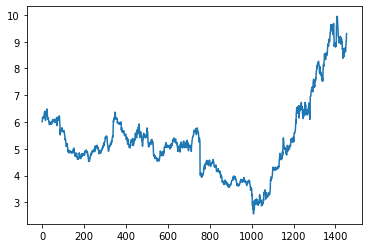

In [173]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [174]:
import numpy as np

In [175]:
df1

0       6.010
1       6.080
2       6.165
3       6.180
4       6.155
        ...  
1449    8.670
1450    8.810
1451    9.010
1452    9.010
1453    9.300
Name: Close, Length: 1454, dtype: float64

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [177]:
print(df1)

[[0.46612471]
 [0.47560976]
 [0.48712738]
 ...
 [0.87262878]
 [0.87262878]
 [0.91192417]]


# splitting dataset into train and test split

In [178]:

training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [179]:
training_size,test_size

(1017, 437)

In [180]:
len(test_data)

437

In [181]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [182]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [183]:
print(X_train.shape), print(y_train.shape)

(916, 100)
(916,)


(None, None)

In [184]:
print(X_test.shape), print(ytest.shape)

(336, 100)
(336,)


(None, None)

In [185]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model

In [186]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [187]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [188]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=1,verbose=1)

Epoch 1/20
916/916 [==============================] - 61s 67ms/step - loss: 0.0022 - val_loss: 0.0261
Epoch 2/20
916/916 [==============================] - 60s 65ms/step - loss: 6.5338e-04 - val_loss: 0.0055
Epoch 3/20
916/916 [==============================] - 60s 65ms/step - loss: 5.0614e-04 - val_loss: 0.0055-0 - ETA: 1s - loss: 5.1685e- - ET
Epoch 4/20
916/916 [==============================] - 60s 66ms/step - loss: 4.7514e-04 - val_loss: 0.0022-
Epoch 5/20
916/916 [==============================] - 61s 67ms/step - loss: 3.4183e-04 - val_loss: 0.0020
Epoch 6/20
916/916 [==============================] - 60s 66ms/step - loss: 3.0427e-04 - val_loss: 3.4852e-04
Epoch 7/20
916/916 [==============================] - 60s 66ms/step - loss: 2.4081e-04 - val_loss: 5.5714e-04
Epoch 8/20
916/916 [==============================] - 63s 69ms/step - loss: 2.3868e-04 - val_loss: 0.0025
Epoch 9/20
916/916 [==============================] - 66s 72ms/step - loss: 2.2315e-04 - val_loss: 0.0015
Epoch 1

In [191]:
import tensorflow as tf

In [192]:
tf.__version__

'2.3.0'

In [195]:

train_predict=model.predict(X_train)

test_predict=model.predict(X_test)

In [196]:
test_predict

array([[0.22383082],
       [0.22164875],
       [0.22774518],
       [0.22270523],
       [0.22225189],
       [0.2259722 ],
       [0.23216048],
       [0.23099989],
       [0.22869898],
       [0.23527418],
       [0.23195875],
       [0.23318404],
       [0.22966388],
       [0.23825029],
       [0.23580126],
       [0.24803847],
       [0.2708085 ],
       [0.27575898],
       [0.2855668 ],
       [0.30098405],
       [0.29153255],
       [0.29113987],
       [0.29590353],
       [0.29033402],
       [0.27351758],
       [0.29178676],
       [0.28181815],
       [0.2776155 ],
       [0.28518778],
       [0.28191936],
       [0.27561602],
       [0.31092742],
       [0.2904853 ],
       [0.3200395 ],
       [0.35266376],
       [0.3727458 ],
       [0.37420306],
       [0.36214694],
       [0.34344587],
       [0.33657557],
       [0.33326903],
       [0.32680404],
       [0.33398265],
       [0.32432476],
       [0.32716426],
       [0.3291074 ],
       [0.31448337],
       [0.313

In [197]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [198]:
print(test_predict,train_predict)

[[4.2218714]
 [4.2057676]
 [4.250759 ]
 [4.2135644]
 [4.210219 ]
 [4.2376747]
 [4.2833443]
 [4.274779 ]
 [4.257798 ]
 [4.3063235]
 [4.2818556]
 [4.290898 ]
 [4.2649193]
 [4.328287 ]
 [4.310213 ]
 [4.4005237]
 [4.568567 ]
 [4.605101 ]
 [4.677483 ]
 [4.791262 ]
 [4.7215104]
 [4.718612 ]
 [4.753768 ]
 [4.712665 ]
 [4.5885596]
 [4.7233863]
 [4.649818 ]
 [4.618802 ]
 [4.6746855]
 [4.6505647]
 [4.6040463]
 [4.8646445]
 [4.7137814]
 [4.9318914]
 [5.1726584]
 [5.3208637]
 [5.331619 ]
 [5.2426443]
 [5.1046305]
 [5.0539274]
 [5.0295253]
 [4.9818134]
 [5.034792 ]
 [4.9635167]
 [4.9844723]
 [4.9988127]
 [4.8908873]
 [4.8858137]
 [4.808534 ]
 [4.850805 ]
 [4.8118906]
 [4.7439184]
 [4.8240986]
 [4.9492946]
 [5.071768 ]
 [5.046252 ]
 [5.036816 ]
 [4.898547 ]
 [5.058377 ]
 [4.948016 ]
 [5.043711 ]
 [5.0658755]
 [5.0423512]
 [5.0284524]
 [4.965047 ]
 [5.0412474]
 [5.0865326]
 [5.0880966]
 [5.0416203]
 [5.0717998]
 [5.1185102]
 [5.190648 ]
 [5.3196025]
 [5.207346 ]
 [5.2876544]
 [5.301825 ]
 [5.3434715]

In [199]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4.525692172185719

In [200]:

math.sqrt(mean_squared_error(ytest,test_predict))

6.238891320075799

In [201]:
mape = np.mean(np.abs((ytest-test_predict)/ytest))*100
mape

1203.5232494863724

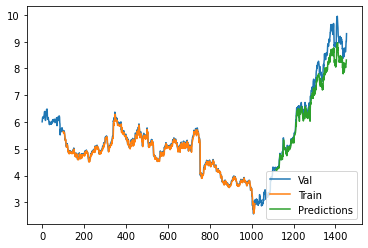

In [202]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Val','Train','Predictions'],loc='lower right')
plt.show()

In [203]:
len(test_data)

437

In [204]:
x_input=test_data[337:].reshape(1,-1)
x_input.shape


(1, 100)

In [205]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [206]:
temp_input

[0.7899728703558895,
 0.813008111433098,
 0.8075880623104705,
 0.813008111433098,
 0.8008129686011447,
 0.8021680131878428,
 0.8102981514838665,
 0.8075880623104705,
 0.8306233033876791,
 0.85230349987819,
 0.8509485845156561,
 0.8617886827609116,
 0.85230349987819,
 0.8482384953422601,
 0.8563686336382839,
 0.8834688792514225,
 0.8753387409553988,
 0.8848239238381204,
 0.8712737364194689,
 0.88888892837405,
 0.8970189374459094,
 0.9173442185738865,
 0.9173442185738865,
 0.9376693704776993,
 0.9525746024830486,
 0.9579946516056763,
 0.9268292722324438,
 0.9281843168191419,
 0.9336043659417697,
 0.9417345042377934,
 0.945799508773723,
 0.9579946516056763,
 0.9349594105284675,
 0.9173442185738865,
 0.9078591649153291,
 0.9268292722324438,
 0.9376693704776993,
 0.963414700728304,
 0.9512195578963507,
 0.8915988883232817,
 0.8482384953422601,
 0.8563686336382839,
 0.8482384953422601,
 0.8631435981234454,
 0.8509485845156561,
 0.8644986427101433,
 0.8441734908063305,
 0.8604336381742137,
 0

In [207]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<1):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.81437874]
101
[[0.8143787384033203]]


In [210]:
result = scaler.inverse_transform(lst_output)

In [211]:
result


array([[8.58011492]])

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [100]:
import matplotlib.pyplot as plt

In [101]:
len(df1)

1454

In [102]:
len(df)

1454

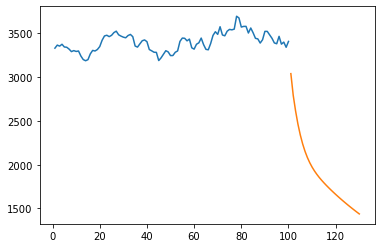

In [103]:
plt.plot(day_new,scaler.inverse_transform(df1[1354:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

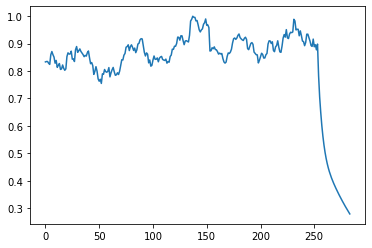

In [104]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [105]:
df3=scaler.inverse_transform(df3).tolist()

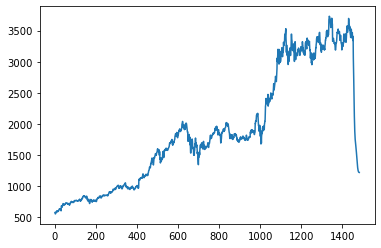

In [89]:
plt.plot(df3)